<a href="https://colab.research.google.com/github/marinaepitropaki/Time_series_analysis/blob/main/Binning_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from astropy.time import Time
from astropy import time, coordinates as coord, units as u
import math
from scipy import *
from numpy import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def csv_create(file_path, array, header):
  """ Creation of a CSV file with the processed data"""

  f = open(file_path, mode='w')
  f.write(header)
  row = []
  for row in array:
    str_row = ','.join([str(x) for x in row]) + '\n'
    f.write(str_row)
  f.close()

In [ ]:
#Loading CSV file
csv_file = '/content/drive/MyDrive/AstroPractice/photometry_nobkg_v432per_10.csv'

In [ ]:
# Extraction of the file in np.array

float_data = []
with open(csv_file, 'r') as f:
  file_to_split = f.read()
  for i, row in enumerate(file_to_split.split('\n')):
    if i ==0 or not row:
      continue
    splitted_row = row.split(',')
    float_row =[float(f) for f in  splitted_row]
    float_data. append(float_row)
    # print(float_row)
  print(float_data)
flux_data = np.array(float_data)

[[2459164.523888889, 363918.97755924624, 229346.56535953592, 123485.53083522196], [2459164.524386574, 372590.10523800104, 233165.2501260069, 120998.58721786729], [2459164.5248958333, 390381.05637815397, 231978.22378662668, 119414.63116414325], [2459164.5254050926, 386376.4823892415, 228643.16751848327, 124803.31663361703], [2459164.525914352, 385099.2977022647, 229852.89546163735, 122623.75364116007], [2459164.526412037, 416353.86013336875, 239570.01489077107, 123225.53149367787], [2459164.5269212965, 367089.5962345178, 231609.0025638366, 123472.23818544656], [2459164.527430556, 386468.1318337811, 230629.38383277852, 119672.5957391632], [2459164.5279282406, 385867.5783402455, 230193.0756096692, 119637.98488465199], [2459164.5284375, 371144.3738876143, 232589.85103169648, 122099.71163691], [2459164.528946759, 387885.91148536984, 230641.1492836801, 121644.46413174093], [2459164.5294444445, 385026.74751368014, 233008.98515445075, 121994.78408582821], [2459164.5299537037, 387098.842890571,

In [ ]:
array_data = flux_data.copy()

# Minimum Julian Day from data
jd_min = array_data[0,0]

#Normalization the objects
array_data[:,0] = array_data[:, 0] - jd_min
array_data[:,1] = array_data[:, 1] / array_data[:, 1].max()
array_data[:,2] = array_data[:,2] / array_data[:,2].max()
array_data[:,3] = array_data[:,3] / array_data[:,3].max()
type(array_data)

#Division of the normalized main object with the comparison
star_division = np.zeros_like(array_data[:, :3])
star_division[:,0] = array_data[:,0]
star_division[:,1] = array_data[:,1] /array_data[:,2]
star_division[:,2] = array_data[:,1]/ array_data[:,3]

In [ ]:
#Crop of the area of the curve with the eclipse from the binned and moved average
# data
start_fit_x = 0.07
end_fit_x = 0.11
flux_crop = star_division[(star_division[:,0] > start_fit_x) & 
                          (star_division[:,0] < end_fit_x)]


In [ ]:
#Calculation of moving average

array_to_move = flux_crop.copy()
starting_point = array_to_move[0,0]
window_size = 3 #in minutes
step = 1

window_size= window_size/(24*60) #in days
step = step/(24*60) #in days

moved_array =[]
for i in range(0, int((array_to_move[:,0].max()-starting_point)/step)):
  cut_data = array_to_move[(array_to_move[:,0] >= (starting_point+step*i)) & (array_to_move[:,0] < (starting_point + step*i+window_size))]
  # print('i', i, 'start',starting_point + step*i, 'end', starting_point + step*i+window_size)
  moved_array.append(cut_data.mean(axis=0))

  

moved_array=np.array(moved_array)
# print(moved_array)

path = '/content/drive/MyDrive/AstroPractice/v432permoved_10.csv'
header = '#time, moved_array_star1, moved_array_star2\n'
csv_create (path, moved_array, header)


In [ ]:
#Calculation of Binning

data_to_bin = flux_crop.copy()
starting_point = data_to_bin[0,0]
window_size = 3 #in minutes

window_size= window_size/(24*60) #in days

binned_data = []
for i in range(0, int((data_to_bin[:,0].max()-starting_point)/window_size)+1):
  cut_data = data_to_bin[(data_to_bin[:,0] > (starting_point + window_size*i)) & (data_to_bin[:,0] <(starting_point + window_size*(i+1)))]
  # print('i', i, 'start',starting_point + window_size*i, 'end', starting_point + window_size*(i+1))
  binned_data.append(cut_data.mean(axis = 0))

binned_data = np.array(binned_data)
print(binned_data)

path = '/content/drive/MyDrive/AstroPractice/v432perbinned_10.csv'
header = '#time, binned_average_star1, binned_average_star2\n'
csv_create (path, binned_data, header)

[[0.07157986 0.65715015 0.63022817]
 [0.07360243 0.63691775 0.61280493]
 [0.07562211 0.61648546 0.59621655]
 [0.07764468 0.61346173 0.59227761]
 [0.07966725 0.59140184 0.57272844]
 [0.08168982 0.58412117 0.56462311]
 [0.08371238 0.58729673 0.57775978]
 [0.08573495 0.58044296 0.56567161]
 [0.08800926 0.56986215 0.55479283]
 [0.09028356 0.5793275  0.55217538]
 [0.09230613 0.58049085 0.55743368]
 [0.09432581 0.57895048 0.55366369]
 [0.09634838 0.59764942 0.57838937]
 [0.09837095 0.58106678 0.5586721 ]
 [0.10039063 0.60036904 0.57227888]
 [0.10241319 0.60742181 0.59241462]
 [0.1046875  0.62589251 0.60813887]
 [0.10696181 0.63099495 0.62048496]
 [0.10898438 0.66274789 0.64201125]]


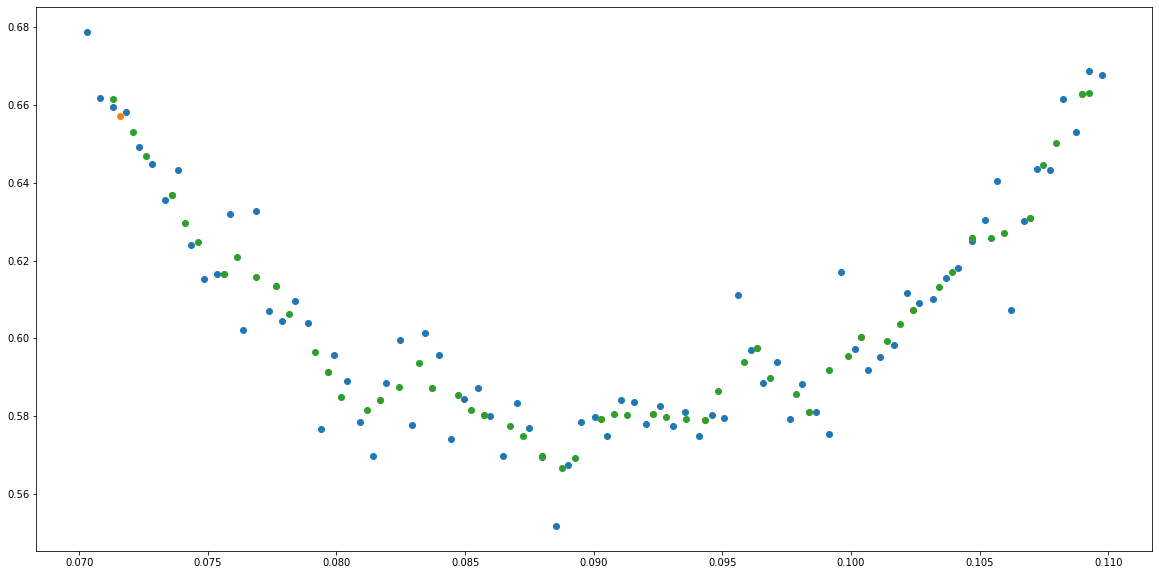

In [ ]:
# Plot of the data, moving_average data and binning data for checking

fig, ax= plt.subplots(1,1, figsize=(20,10))
ax.scatter(data_to_bin[:,0], data_to_bin[:,1])
ax.scatter(binned_data[:,0], binned_data[:,1])
ax.scatter(moved_array[:,0], moved_array[:,1])